# Testing You in Pandas

Given the Risø V52 met mast data, let's select and make some plots.

### Exercises

Make the following plots:  
1. For a wind speed sector from 250 to 340 degrees, plot a histogram of the mean cup anemometer mean wind speed at 70 m.  
2. Scatter plot the turbulence intensity versus the mean wind speed for two heights (your choice). Overlaid plots are preferred, but if you can't figure out how to do it, then separate plots are fine.

Be sure to add axis labels, legends, titles, etc., where applicable.

## Preliminaries

As always, we must first import the modules we want to use before we can write any code. I'm also setting the jupyter matploblib option to be interactive, as we can do in notebooks.

In [1]:
% matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd

Load the mean and std dev `.csv` files to dataframes and concatenate them.

In [2]:
dfs = []
for csv_name, suffix in zip(['demo_risoe_data_means.csv', 'demo_risoe_data_stdvs.csv'], ['_mean', '_stdv']):
    df_path = f'data/{csv_name}'
    df = pd.read_csv(df_path)  # load csv to dataframe
    df['name'] = pd.to_datetime(df['name'].astype(str), format='%Y%m%d%H%M')  # convert name to datetime
    df.set_index('name', inplace=True)  # set name as index
    df = df.add_suffix(suffix)
    dfs.append(df)
met_df = pd.concat(dfs, axis=1);  # suppress jupyter output with semicolon

## Exercise 1: Wind Speed Histogram for Sector

For a wind speed sector from 250 to 340 degrees, plot a histogram of the mean cup anemometer mean wind speed at 70 m.

<IPython.core.display.Javascript object>


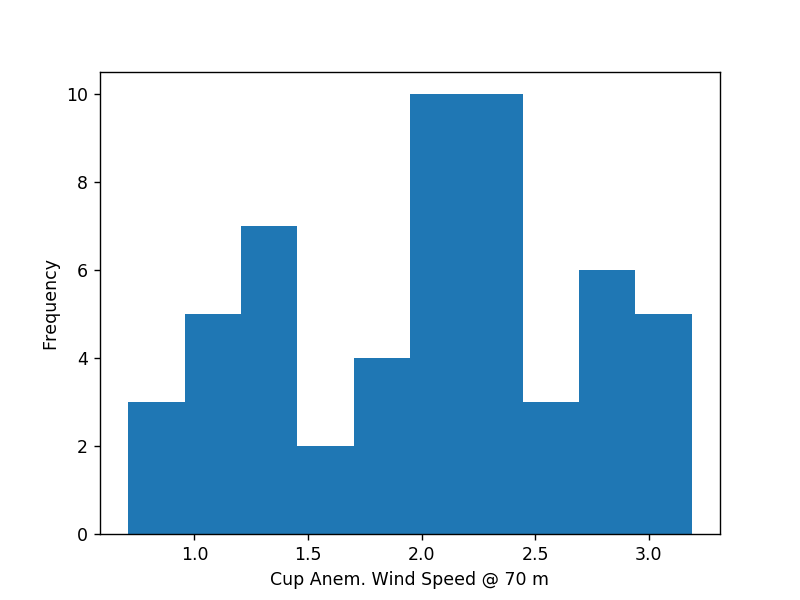

In [3]:
ax = met_df[(met_df.Wdir_41m_mean >= 250) & (met_df.Wdir_41m_mean <= 340)].plot(y='Wsp_70m_mean', kind='hist')
ax.set_xlabel('Cup Anem. Wind Speed @ 70 m')
ax.legend().set_visible(False)  # hide the legend since we have an x axis

## Exercise 2: TI vs U

Scatter plot the turbulence intensity versus the mean wind speed for two heights (your choice).

<IPython.core.display.Javascript object>


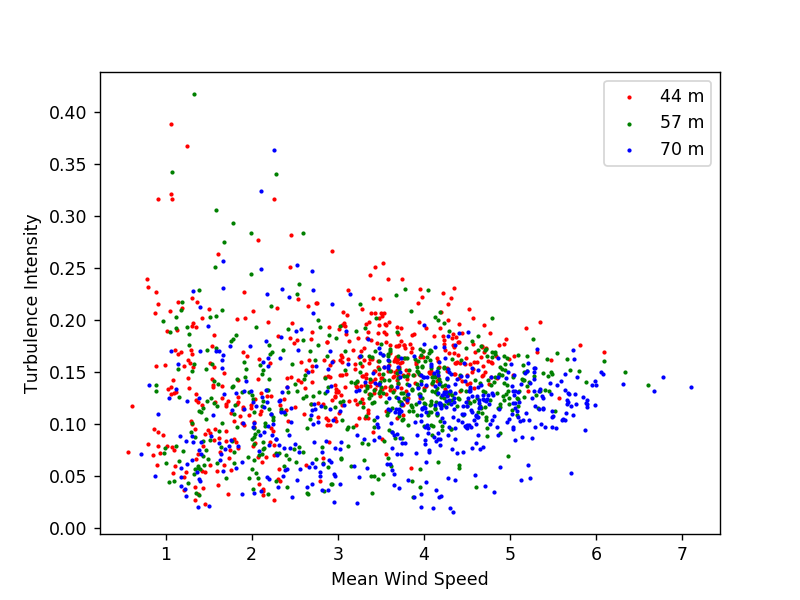

In [4]:
heights = [44, 57, 70]  # I'll do three because it's fun!
colors = ['r', 'g', 'b']
ax = None
for i_ht, ht in enumerate(heights):
    met_df[f'TI_{ht}m'] = met_df[f'Wsp_{ht}m_stdv'] / met_df[f'Wsp_{ht}m_mean']
    ax = met_df.plot(x=f'Wsp_{ht}m_mean', y=f'TI_{ht}m', kind='scatter',
                     c=colors[i_ht], s=2, label=f'{ht} m', ax=ax)
ax.legend()
ax.set_xlabel('Mean Wind Speed')
ax.set_ylabel('Turbulence Intensity');